In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Data visualisation

In [17]:
#gathering data from the dataset

movies = pd.read_csv('dataset/movies.dat' , sep='::' , engine='python' , encoding='latin-1' , header=None)
movies.columns = ['movie_id' , 'title' , 'genres']

ratings = pd.read_csv('dataset/ratings.dat' , sep='::' , engine='python' , encoding='latin-1' , header=None)
ratings.columns = ['user_id' , 'movie_id' , 'rating' , 'timestamp']

users = pd.read_csv('dataset/users.dat' , sep='::' , engine='python' , encoding='latin-1' , header=None)
users.columns = ['user_id','gender','age','occupation','zip_code']

In [18]:
print(movies.shape , ratings.shape , users.shape)

movies.info()
ratings.info()
users.info()

(3883, 3) (1000209, 4) (6040, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  3883 non-null   int64 
 1   title     3883 non-null   object
 2   genres    3883 non-null   object
dtypes: int64(1), object(2)
memory usage: 91.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype
---  ------     --------------    -----
 0   user_id    1000209 non-null  int64
 1   movie_id   1000209 non-null  int64
 2   rating     1000209 non-null  int64
 3   timestamp  1000209 non-null  int64
dtypes: int64(4)
memory usage: 30.5 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     6040 non-null   int64 
 1 

In [19]:
#merging the dataframes movies and ratings on the basis of movie_id aggregate the ratings of each movie
movie_ratings = pd.merge(movies , ratings , on='movie_id')
movie_ratings = movie_ratings.groupby('title').agg({'rating': [np.size , np.mean]})
movie_ratings.head()

/tmp/ipykernel_64308/379411917.py:3: FutureWarning: The provided callable <function mean at 0x74fadc296c00> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  movie_ratings = movie_ratings.groupby('title').agg({'rating': [np.size , np.mean]})


rating          
                                size      mean
title                                         
$1,000,000 Duck (1971)            37  3.027027
'Night Mother (1986)              70  3.371429
'Til There Was You (1997)         52  2.692308
'burbs, The (1989)               303  2.910891
...And Justice for All (1979)    199  3.713568

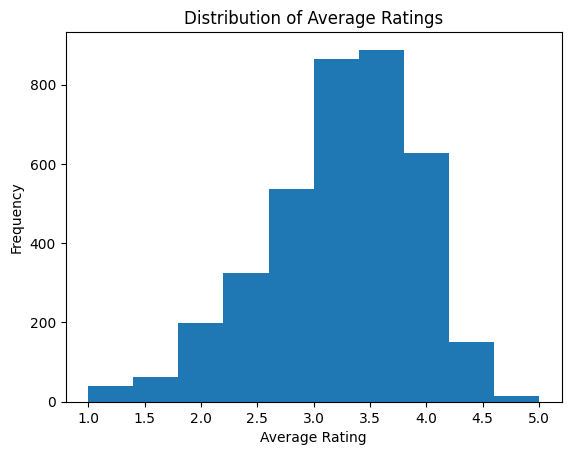

In [20]:
#plot the average rating of each movie
plt.hist(movie_ratings['rating']['mean'])
plt.xlabel('Average Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Average Ratings')
plt.show()

In [21]:
#show the relationship between the average rating and genre
genres = set()
for genre in movies.genres.str.split('|').values:
    genres = genres.union(set(genre))
genres = list(genres)

#one hot encoding the genres
movies_encoded = movies.copy()
for genre in genres:
    movies_encoded[genre] = movies.genres.str.contains(genre).map({True:1 , False:0})
movies_encoded.drop('genres' , axis=1 , inplace=True)
movies_encoded.head(20)

,movie_id,title,Crime,Documentary,Thriller,Musical,Western,Adventure,Children's,Romance,Drama,Comedy,Film-Noir,Horror,Mystery,Sci-Fi,Action,War,Animation,Fantasy
0,1,Toy Story (1995),0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0
1,2,Jumanji (1995),0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1
2,3,Grumpier Old Men (1995),0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0
3,4,Waiting to Exhale (1995),0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0
4,5,Father of the Bride Part II (1995),0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
5,6,Heat (1995),1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
6,7,Sabrina (1995),0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0
7,8,Tom and Huck (1995),0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0
8,9,Sudden Death (1995),0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
9,10,GoldenEye (1995),0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0


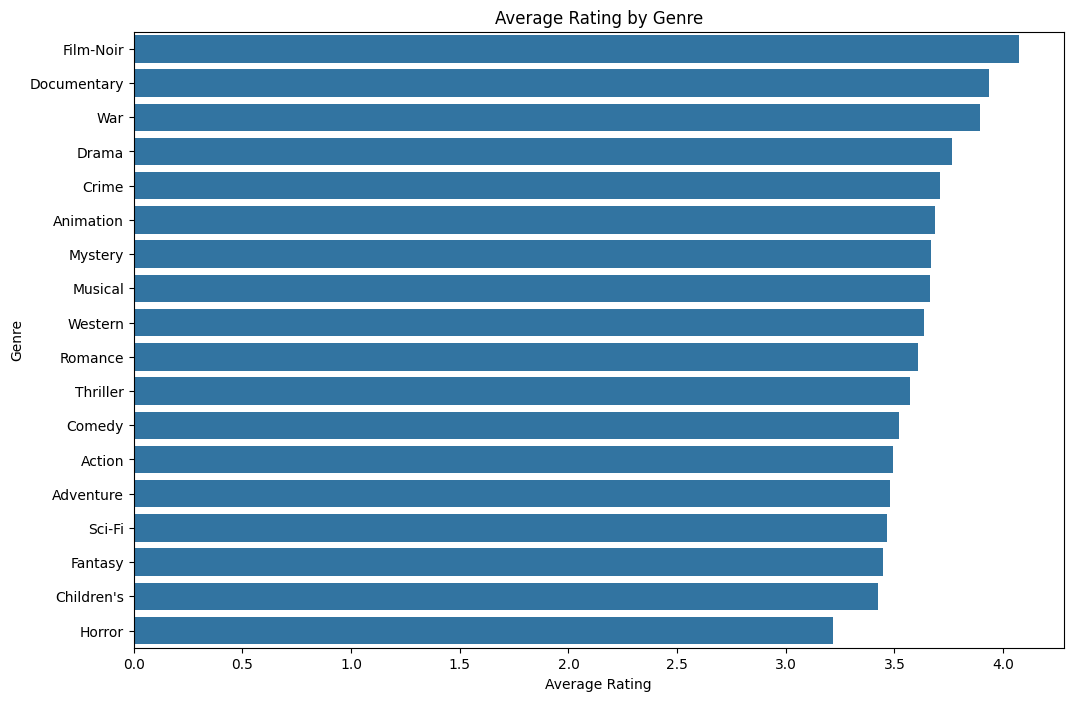

In [22]:
#merge movies and ratings dataframes on the basis of genre and aggregate the ratings of each genre

movies_exploded = movies.copy()
movies_exploded['genre'] = movies_exploded['genres'].str.split('|')
movies_exploded = movies_exploded.explode('genre')

# Step 3: Merge with ratings DataFrame on movieId
merged_data = pd.merge(movies_exploded[['movie_id', 'genre']], ratings[['movie_id', 'rating']], on='movie_id')

# Step 4: Calculate the average rating for each genre
genre_ratings = merged_data.groupby('genre')['rating'].mean().reset_index()
genre_ratings.columns = ['genre', 'average_rating']

genre_ratings_sorted = genre_ratings.sort_values(by='average_rating', ascending=False)

# Display the average rating per genre in a bar chart top to bottom sorted
plt.figure(figsize=(12, 8))
sns.barplot(x='average_rating', y='genre', data=genre_ratings_sorted)
plt.xlabel('Average Rating')
plt.ylabel('Genre')
plt.title('Average Rating by Genre')
plt.show()


### Data Preprocessing